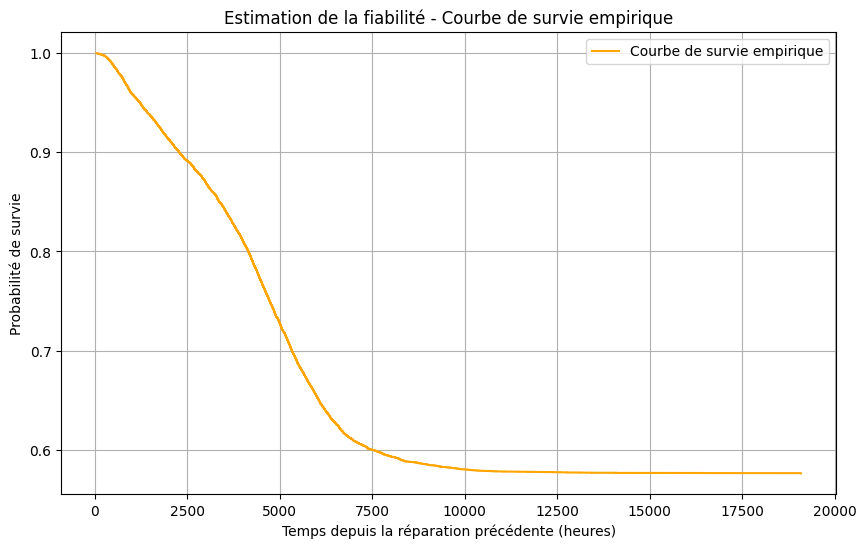

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
file_path = "masked_data.csv"
df = pd.read_csv(file_path)

# Trier les données par temps croissant
df_sorted = df.sort_values(by="time since previous repair")

# Extraire les valeurs de temps et d'événements (pannes)
times = df_sorted["time since previous repair"].values
events = 1 - df_sorted["censored"].values  # 1 = panne, 0 = censure

# Nombre total de produits au début
n_total = len(times)
n_failures = np.cumsum(events)  # Nombre cumulé de pannes

# Calcul de la fonction de survie empirique
survival_prob = 1 - (n_failures / n_total)

# Tracer la courbe de survie
plt.figure(figsize=(10, 6))
plt.step(times, survival_prob, where="post", label="Courbe de survie empirique", color='orange')
plt.xlabel("Temps depuis la réparation précédente (heures)")
plt.ylabel("Probabilité de survie")
plt.title("Estimation de la fiabilité - Courbe de survie empirique")
plt.legend()
plt.grid(True)
plt.show()


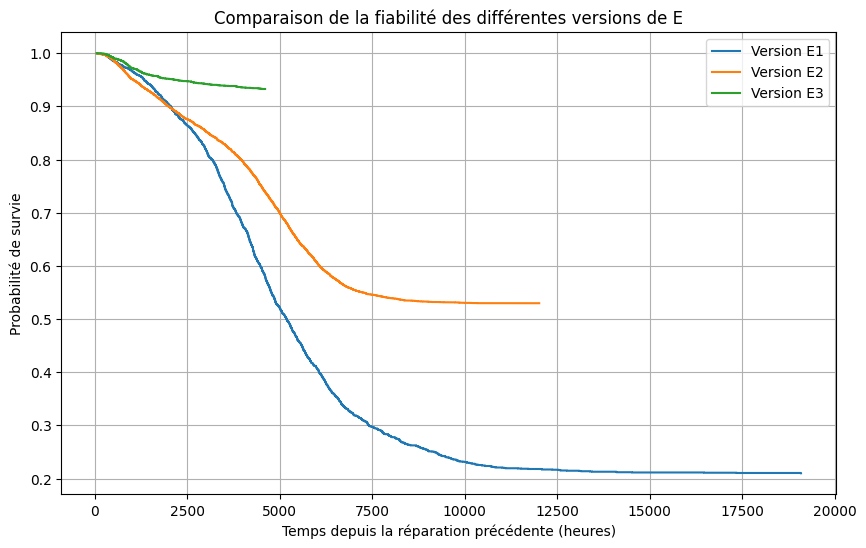

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
file_path = "masked_data.csv"
df = pd.read_csv(file_path)

# Extraire la version du composant "E" à partir du modèle
df["version_E"] = df["model"].str.extract(r'E(\d+)').astype(int)

# Initialiser un dictionnaire pour stocker les courbes de survie par version de E
survival_curves = {}

# Tracer les courbes de survie pour chaque version de E
plt.figure(figsize=(10, 6))
for version in sorted(df["version_E"].unique()):
    # Filtrer les données pour cette version de E
    df_version = df[df["version_E"] == version]
    
    # Trier par temps
    df_version = df_version.sort_values(by="time since previous repair")

    # Extraire le temps et les pannes
    times = df_version["time since previous repair"].values
    events = 1 - df_version["censored"].values  # 1 = panne, 0 = censure

    # Nombre total de produits dans cette version
    n_total = len(times)
    n_failures = np.cumsum(events)  # Nombre cumulé de pannes

    # Calcul de la fonction de survie empirique
    survival_prob = 1 - (n_failures / n_total)
    
    # Stocker la courbe de survie
    survival_curves[version] = (times, survival_prob)
    
    # Tracer la courbe
    plt.step(times, survival_prob, where="post", label=f"Version E{version}")

# Mise en forme du graphique
plt.xlabel("Temps depuis la réparation précédente (heures)")
plt.ylabel("Probabilité de survie")
plt.title("Comparaison de la fiabilité des différentes versions de E")
plt.legend()
plt.grid(True)
plt.show()

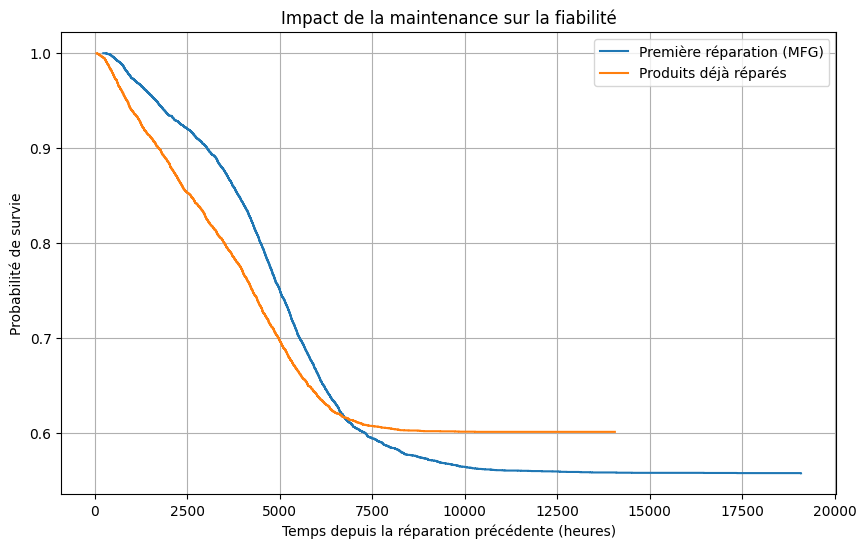

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
file_path = "masked_data.csv"
df = pd.read_csv(file_path)

# Séparer les produits en deux groupes :
# - Ceux qui sont à leur première réparation (MFG)
# - Ceux qui ont déjà été réparés au moins une fois

df_first_repair = df[df["previous repair operation number"] == "MFG"]
df_repaired = df[df["previous repair operation number"] != "MFG"]

# Fonction pour calculer et tracer la courbe de survie
def plot_survival_curve(df_subset, label):
    df_sorted = df_subset.sort_values(by="time since previous repair")

    times = df_sorted["time since previous repair"].values
    events = 1 - df_sorted["censored"].values  # 1 = panne, 0 = censure

    n_total = len(times)
    n_failures = np.cumsum(events)

    survival_prob = 1 - (n_failures / n_total)

    plt.step(times, survival_prob, where="post", label=label)

# Tracer les courbes de survie
plt.figure(figsize=(10, 6))
plot_survival_curve(df_first_repair, "Première réparation (MFG)")
plot_survival_curve(df_repaired, "Produits déjà réparés")

# Mise en forme du graphique
plt.xlabel("Temps depuis la réparation précédente (heures)")
plt.ylabel("Probabilité de survie")
plt.title("Impact de la maintenance sur la fiabilité")
plt.legend()
plt.grid(True)
plt.show()


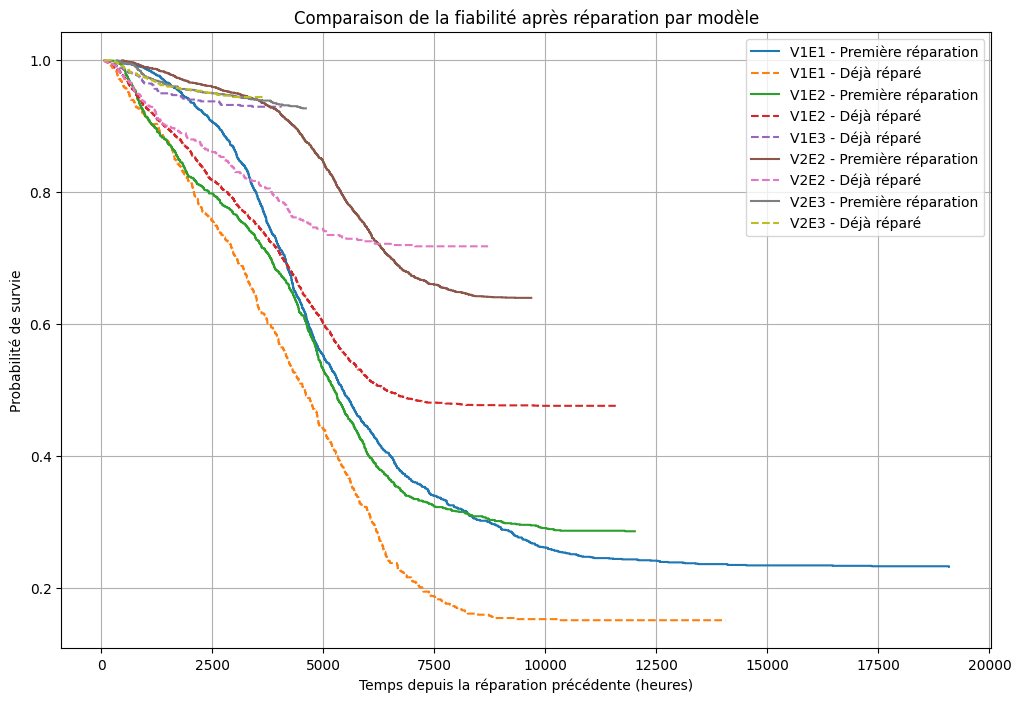

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
file_path = "masked_data.csv"
df = pd.read_csv(file_path)

# Liste des modèles uniques
models = df["model"].unique()

# Tracer les courbes de survie par modèle, séparant les produits neufs et réparés
plt.figure(figsize=(12, 8))

for model in sorted(models):
    df_model = df[df["model"] == model]
    
    # Séparer les premières réparations et les produits déjà réparés
    df_model_first_repair = df_model[df_model["previous repair operation number"] == "MFG"]
    df_model_repaired = df_model[df_model["previous repair operation number"] != "MFG"]

    # Tracer la courbe pour les produits en première utilisation
    if not df_model_first_repair.empty:
        df_model_sorted = df_model_first_repair.sort_values(by="time since previous repair")
        times = df_model_sorted["time since previous repair"].values
        events = 1 - df_model_sorted["censored"].values
        n_total = len(times)
        n_failures = np.cumsum(events)
        survival_prob = 1 - (n_failures / n_total)
        plt.step(times, survival_prob, where="post", label=f"{model} - Première réparation")

    # Tracer la courbe pour les produits ayant déjà été réparés
    if not df_model_repaired.empty:
        df_model_sorted = df_model_repaired.sort_values(by="time since previous repair")
        times = df_model_sorted["time since previous repair"].values
        events = 1 - df_model_sorted["censored"].values
        n_total = len(times)
        n_failures = np.cumsum(events)
        survival_prob = 1 - (n_failures / n_total)
        plt.step(times, survival_prob, where="post", linestyle="dashed", label=f"{model} - Déjà réparé")

# Mise en forme du graphique
plt.xlabel("Temps depuis la réparation précédente (heures)")
plt.ylabel("Probabilité de survie")
plt.title("Comparaison de la fiabilité après réparation par modèle")
plt.legend()
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/reliability/Utils.py:990: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(xlim_lower, xlim_upper)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/reliability/Utils.py:990: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(xlim_lower, xlim_upper)


AttributeError: 'Fit_Weibull_2P' object has no attribute 'AIC'

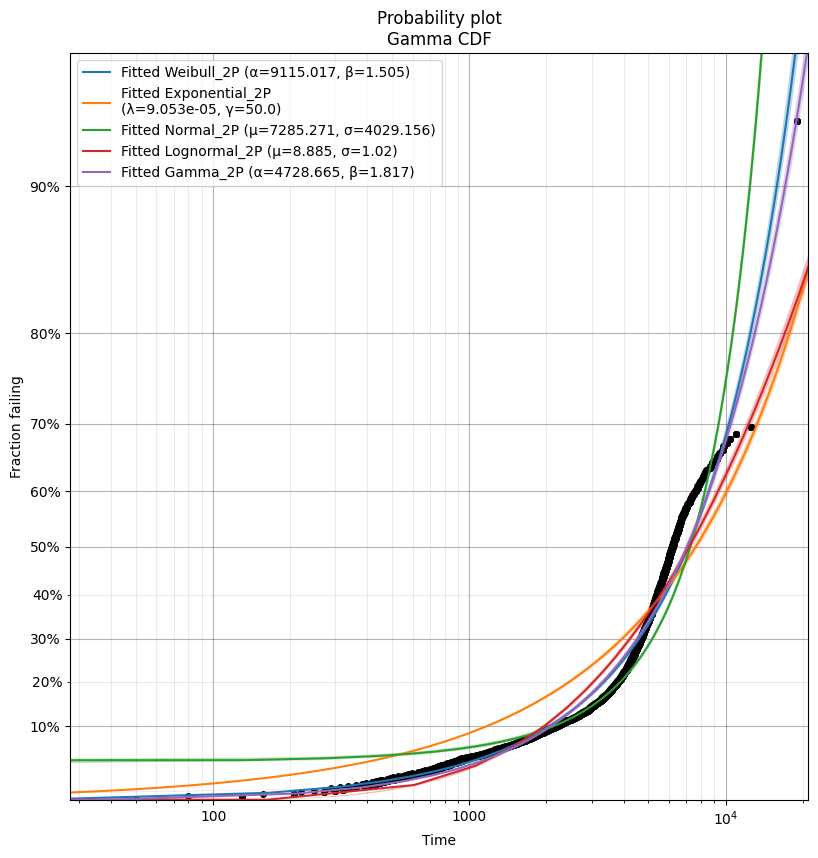

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from reliability.Fitters import Fit_Weibull_2P, Fit_Exponential_2P, Fit_Normal_2P, Fit_Lognormal_2P, Fit_Gamma_2P

# Charger les données
file_path = "masked_data.csv"
df = pd.read_csv(file_path)

# Trier les données par temps croissant
df_sorted = df.sort_values(by="time since previous repair")

# Extraire les valeurs de temps et d'événements (pannes)
times = df_sorted["time since previous repair"].values
events = 1 - df_sorted["censored"].values  # 1 = panne, 0 = censure

# Ajuster plusieurs distributions et comparer
fits = {
    "Weibull_2P": Fit_Weibull_2P(failures=times[events == 1], right_censored=times[events == 0], print_results=False),
    "Exponential_2P": Fit_Exponential_2P(failures=times[events == 1], right_censored=times[events == 0], print_results=False),
    "Normal_2P": Fit_Normal_2P(failures=times[events == 1], right_censored=times[events == 0], print_results=False),
    "Lognormal_2P": Fit_Lognormal_2P(failures=times[events == 1], right_censored=times[events == 0], print_results=False),
    "Gamma_2P": Fit_Gamma_2P(failures=times[events == 1], right_censored=times[events == 0], print_results=False)
}

# Sélectionner la meilleure distribution selon le critère AIC
best_fit = min(fits.items(), key=lambda x: x[1].AIC)
print(f"Meilleure distribution sélectionnée : {best_fit[0]}")

# Générer la fonction de fiabilité prédite avec la meilleure distribution
time_range = np.linspace(0, max(times), 100)
reliability_values = best_fit[1].distribution.SF(time_range)  # Fonction de survie (fiabilité)

# Tracer la courbe de fiabilité
plt.figure(figsize=(10, 6))
plt.plot(time_range, reliability_values, label=f"Fonction de fiabilité ({best_fit[0]})", color='blue')
plt.xlabel("Temps depuis la réparation précédente (heures)")
plt.ylabel("Probabilité de survie")
plt.title("Estimation de la fonction de fiabilité - Meilleure distribution")
plt.legend()
plt.grid(True)
plt.show()